In [155]:
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

In [156]:
!pip install pyspark

In [157]:
spark = SparkSession.builder.appName("Employee-Atrrition-2").getOrCreate()

In [158]:
spark

In [159]:
import pyspark.sql.functions

In [160]:
df= spark.read.csv("C:/Users/sanj/OneDrive/Documents/lr/HR Employee Attrition.csv",header=True,inferSchema=True)

In [161]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: integer (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- Perfo

In [162]:
df.show(5)

+---+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------+
|Age|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsIn

In [163]:
df.columns


['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition']

In [164]:
df.groupby("EducationField").mean("MonthlyIncome").show()

+----------------+------------------+
|  EducationField|avg(MonthlyIncome)|
+----------------+------------------+
|Technical Degree|  5758.30303030303|
|           Other| 6071.548780487805|
|       Marketing| 7348.584905660377|
|         Medical| 6510.036637931034|
|   Life Sciences| 6463.288778877888|
| Human Resources| 7241.148148148148|
+----------------+------------------+



In [165]:
df.groupby("EducationField").sum("MonthlyIncome").show()

+----------------+------------------+
|  EducationField|sum(MonthlyIncome)|
+----------------+------------------+
|Technical Degree|            760096|
|           Other|            497867|
|       Marketing|           1168425|
|         Medical|           3020657|
|   Life Sciences|           3916753|
| Human Resources|            195511|
+----------------+------------------+



In [166]:
df.groupby("EducationField").max("MonthlyIncome").show()

+----------------+------------------+
|  EducationField|max(MonthlyIncome)|
+----------------+------------------+
|Technical Degree|             19943|
|           Other|             19613|
|       Marketing|             19845|
|         Medical|             19859|
|   Life Sciences|             19999|
| Human Resources|             19636|
+----------------+------------------+



In [167]:
df.groupby("EducationField").min("MonthlyIncome").show()

+----------------+------------------+
|  EducationField|min(MonthlyIncome)|
+----------------+------------------+
|Technical Degree|              1091|
|           Other|              1951|
|       Marketing|              1675|
|         Medical|              1009|
|   Life Sciences|              1051|
| Human Resources|              1555|
+----------------+------------------+



In [168]:
mi=df.groupby("EducationField").sum("MonthlyIncome")

<Axes: xlabel='EducationField'>

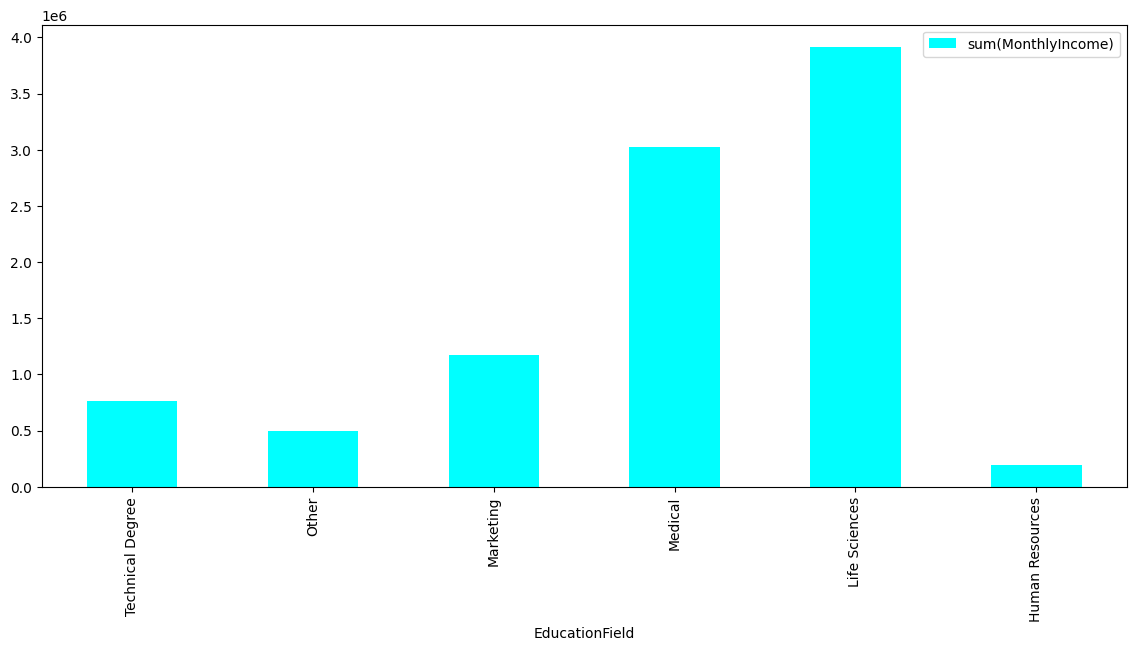

In [169]:
mi.toPandas().plot.bar(x='EducationField',figsize=(14, 6),color='cyan')

In [170]:
mi_e=df.groupby("JobRole").sum("MonthlyIncome")

<Axes: xlabel='JobRole'>

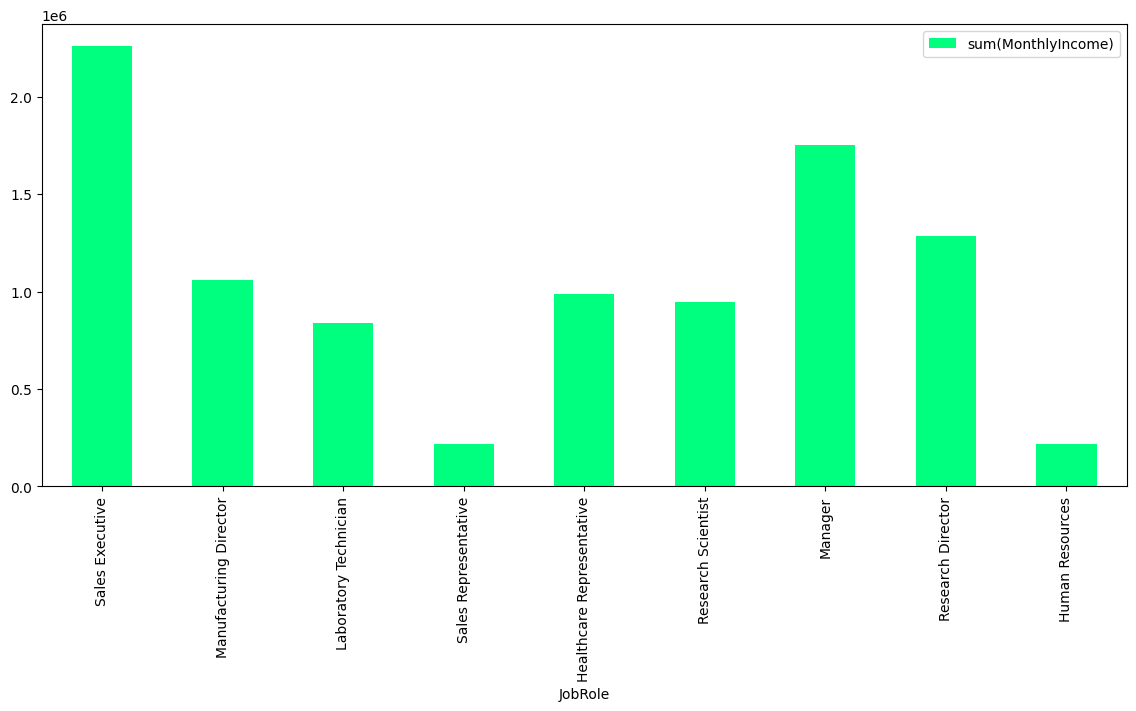

In [171]:
mi_e.toPandas().plot.bar(x='JobRole',figsize=(14, 6),color='springgreen')

In [172]:
df.groupby("Department").mean("MonthlyIncome").show()

+--------------------+------------------+
|          Department|avg(MonthlyIncome)|
+--------------------+------------------+
|               Sales|  6959.17264573991|
|Research & Develo...| 6281.252861602497|
|     Human Resources| 6654.507936507936|
+--------------------+------------------+



In [173]:
df.groupby("Department").sum("MonthlyIncome").show()

+--------------------+------------------+
|          Department|sum(MonthlyIncome)|
+--------------------+------------------+
|               Sales|           3103791|
|Research & Develo...|           6036284|
|     Human Resources|            419234|
+--------------------+------------------+



In [174]:
df.groupby("BusinessTravel").sum("MonthlyIncome").show()

+-----------------+------------------+
|   BusinessTravel|sum(MonthlyIncome)|
+-----------------+------------------+
|Travel_Frequently|           1715662|
|        0n-Travel|            939292|
|    Travel_Rarely|           6904355|
+-----------------+------------------+



In [175]:
df.groupby("BusinessTravel","JobRole").mean("MonthlyIncome").show()

+-----------------+--------------------+------------------+
|   BusinessTravel|             JobRole|avg(MonthlyIncome)|
+-----------------+--------------------+------------------+
|    Travel_Rarely|  Research Scientist|3244.9142857142856|
|Travel_Frequently|     Human Resources|            4306.6|
|Travel_Frequently|  Research Scientist|3442.3703703703704|
|Travel_Frequently|Sales Representative|2250.9565217391305|
|Travel_Frequently|Manufacturing Dir...| 7872.172413793103|
|        0n-Travel|Sales Representative|            2658.8|
|    Travel_Rarely|             Manager|17152.844155844155|
|    Travel_Rarely|Laboratory Techni...|3152.1722222222224|
|    Travel_Rarely|Sales Representative|2779.8545454545456|
|Travel_Frequently|     Sales Executive| 7085.457627118644|
|    Travel_Rarely|   Research Director| 16322.90322580645|
|        0n-Travel|Laboratory Techni...|3418.3928571428573|
|        0n-Travel|  Research Scientist|2812.5714285714284|
|        0n-Travel|             Manager|

In [176]:
df.groupby("BusinessTravel","Department").mean("MonthlyIncome").show()

+-----------------+--------------------+------------------+
|   BusinessTravel|          Department|avg(MonthlyIncome)|
+-----------------+--------------------+------------------+
|Travel_Frequently|     Human Resources| 5569.636363636364|
|Travel_Frequently|Research & Develo...| 6306.461538461538|
|    Travel_Rarely|               Sales|  7227.55873015873|
|        0n-Travel|               Sales| 6818.936170212766|
|    Travel_Rarely|Research & Develo...|  6339.99706744868|
|        0n-Travel|     Human Resources| 9028.666666666666|
|Travel_Frequently|               Sales| 6031.190476190476|
|    Travel_Rarely|     Human Resources| 6604.260869565217|
|        0n-Travel|Research & Develo...| 5820.927835051546|
+-----------------+--------------------+------------------+



In [177]:
df.groupby("Department").max("MonthlyIncome").show()

+--------------------+------------------+
|          Department|max(MonthlyIncome)|
+--------------------+------------------+
|               Sales|             19847|
|Research & Develo...|             19999|
|     Human Resources|             19717|
+--------------------+------------------+



In [178]:
df.groupby("Department").min("MonthlyIncome").show()

+--------------------+------------------+
|          Department|min(MonthlyIncome)|
+--------------------+------------------+
|               Sales|              1052|
|Research & Develo...|              1009|
|     Human Resources|              1555|
+--------------------+------------------+



In [179]:
df.groupby("JobRole").min("MonthlyIncome").show()

+--------------------+------------------+
|             JobRole|min(MonthlyIncome)|
+--------------------+------------------+
|     Sales Executive|              4001|
|Manufacturing Dir...|              4011|
|Laboratory Techni...|              1102|
|Sales Representative|              1052|
|Healthcare Repres...|              4000|
|  Research Scientist|              1009|
|             Manager|             11244|
|   Research Director|             11031|
|     Human Resources|              1555|
+--------------------+------------------+



In [180]:
df.groupby("JobRole").max("MonthlyIncome").show()

+--------------------+------------------+
|             JobRole|max(MonthlyIncome)|
+--------------------+------------------+
|     Sales Executive|             13872|
|Manufacturing Dir...|             13973|
|Laboratory Techni...|              7403|
|Sales Representative|              6632|
|Healthcare Repres...|             13966|
|  Research Scientist|              9724|
|             Manager|             19999|
|   Research Director|             19973|
|     Human Resources|             10725|
+--------------------+------------------+



In [181]:
df.groupby("JobRole").sum("MonthlyIncome").show()

+--------------------+------------------+
|             JobRole|sum(MonthlyIncome)|
+--------------------+------------------+
|     Sales Executive|           2257315|
|Manufacturing Dir...|           1057795|
|Laboratory Techni...|            838427|
|Sales Representative|            217958|
|Healthcare Repres...|            986268|
|  Research Scientist|            946072|
|             Manager|           1752531|
|   Research Director|           1282684|
|     Human Resources|            220259|
+--------------------+------------------+



In [182]:
df.groupby("JobRole").mean("MonthlyIncome").show()

+--------------------+------------------+
|             JobRole|avg(MonthlyIncome)|
+--------------------+------------------+
|     Sales Executive|6924.2791411042945|
|Manufacturing Dir...| 7295.137931034483|
|Laboratory Techni...| 3237.169884169884|
|Sales Representative|            2626.0|
|Healthcare Repres...| 7528.763358778626|
|  Research Scientist| 3239.972602739726|
|             Manager|17181.676470588234|
|   Research Director|          16033.55|
|     Human Resources|           4235.75|
+--------------------+------------------+



In [183]:
df.select('EducationField','MonthlyRate').show(10)

+--------------+-----------+
|EducationField|MonthlyRate|
+--------------+-----------+
| Life Sciences|      19479|
| Life Sciences|      24907|
|         Other|       2396|
| Life Sciences|      23159|
|       Medical|      16632|
| Life Sciences|      11864|
|       Medical|       9964|
| Life Sciences|      13335|
| Life Sciences|       8787|
|       Medical|      16577|
+--------------+-----------+
only showing top 10 rows



In [184]:
df.groupby("Gender").mean("MonthlyIncome").show()

+------+------------------+
|Gender|avg(MonthlyIncome)|
+------+------------------+
|Female| 6686.566326530612|
|  Male| 6380.507936507936|
+------+------------------+



In [185]:
df.groupby("Attrition").count().show()

+---------+-----+
|Attrition|count|
+---------+-----+
|        1|  237|
|        0| 1233|
+---------+-----+



In [186]:
res_df = df.groupBy("EducationField").count().sort("EducationField", ascending=False)

In [187]:
res_df.show()

+----------------+-----+
|  EducationField|count|
+----------------+-----+
|Technical Degree|  132|
|           Other|   82|
|         Medical|  464|
|       Marketing|  159|
|   Life Sciences|  606|
| Human Resources|   27|
+----------------+-----+



<Axes: xlabel='EducationField'>

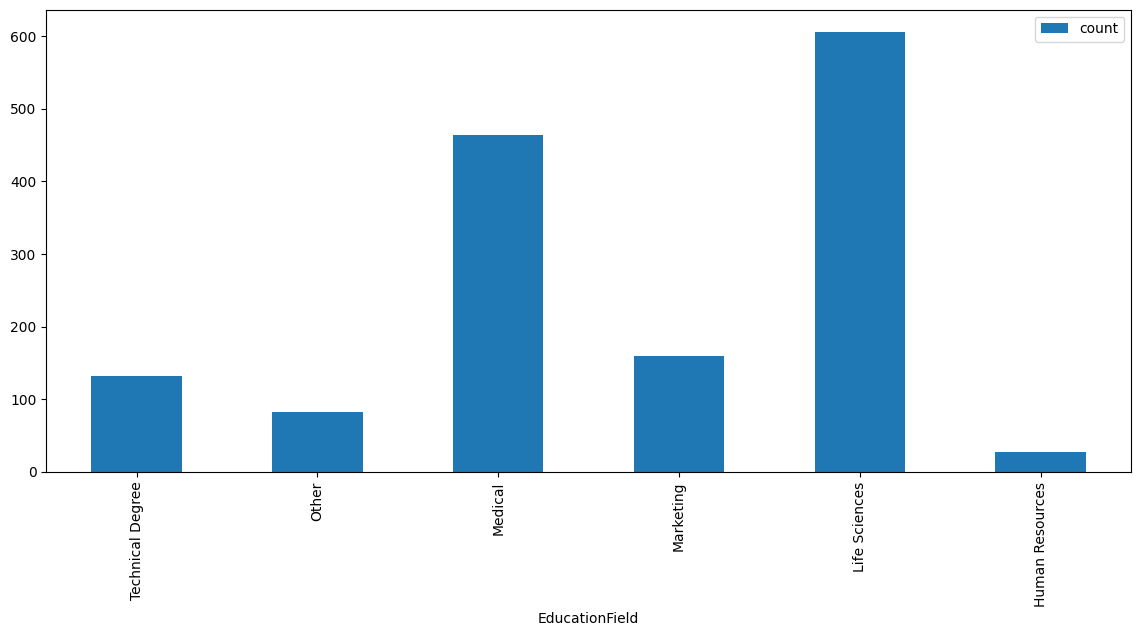

In [188]:
res_df.toPandas().plot.bar(x='EducationField',figsize=(14, 6))

In [189]:
df.describe().toPandas()

summary                 Age BusinessTravel           DailyRate  \
0   count                1470           1470                1470   
1    mean  36.923809523809524           None   802.4857142857143   
2  stddev   9.135373489136729           None  403.50909994352804   
3     min                  18      0n-Travel                 102   
4     max                  60  Travel_Rarely                1499   

        Department  DistanceFromHome           Education    EducationField  \
0             1470              1470                1470              1470   
1             None  9.19251700680272   2.912925170068027              None   
2             None  8.10686443566608  1.0241649445978718              None   
3  Human Resources                 1                   1   Human Resources   
4            Sales                29                   5  Technical Degree   

  EmployeeCount     EmployeeNumber  ... StandardHours    StockOptionLevel  \
0          1470               1470  ...          1470                1470   
1           1.0  1024.865306122449  ...          80.0  0.7938775510204081   
2           0.0  602.0243348474752  ...           0.0  0.8520766679308381   
3             1                  1  ...            80                   0   
4             1               2068  ...            80                   3   

    TotalWorkingYears TrainingTimesLastYear     WorkLifeBalance  \
0                1470                  1470                1470   
1  11.279591836734694    2.7993197278911564  2.7612244897959184   
2   7.780781675514995    1.2892706207958466  0.7064758297141507   
3                   0                     0                   1   
4                  40                     6                   4   

       YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion  \
0                1470               1470                    1470   
1  7.0081632653061225  4.229251700680272      2.1877551020408164   
2   6.126525152403571  3.623137034670627      3.2224302791379693   
3                   0                  0                       0   
4                  40                 18                      15   

  YearsWithCurrManager            Attrition  
0                 1470                 1470  
1     4.12312925170068  0.16122448979591836  
2   3.5681361205404363  0.36786303197196196  
3                    0                    0  
4                   17                    1  

[5 rows x 35 columns]

In [190]:
jr = df.groupBy("JobRole").count().sort("JobRole", ascending=False)

<Axes: xlabel='JobRole'>

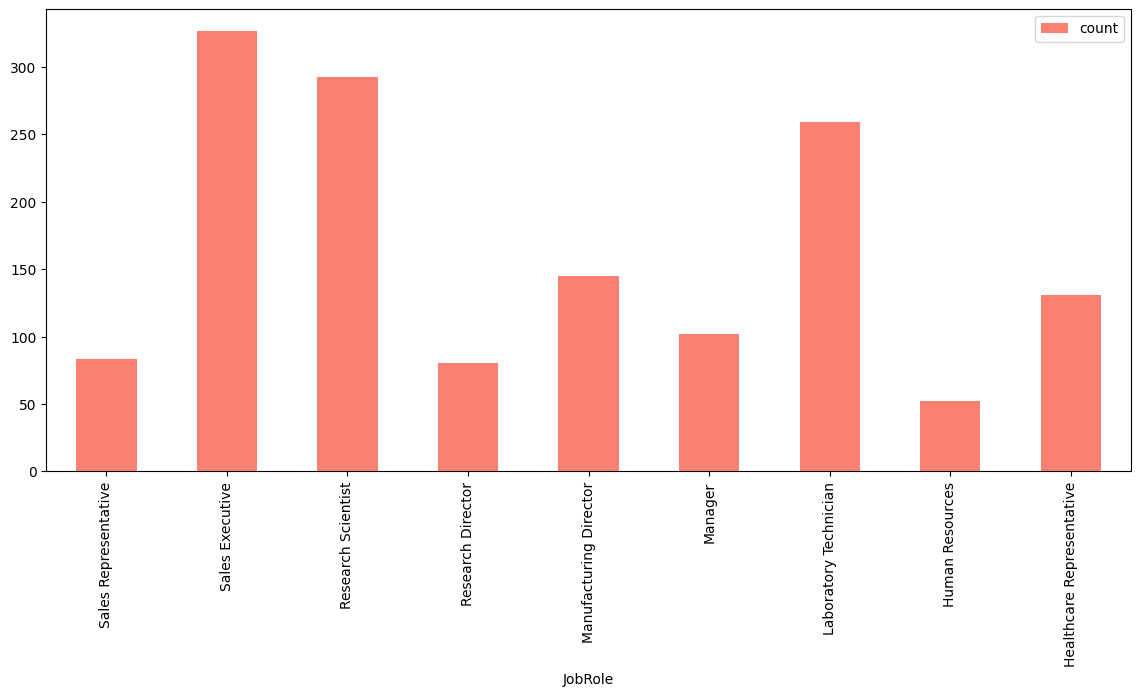

In [191]:
jr.toPandas().plot.bar(x='JobRole',figsize=(14, 6),color='salmon')

In [192]:
df.groupby("MaritalStatus").mean("MonthlyIncome").show()

+-------------+------------------+
|MaritalStatus|avg(MonthlyIncome)|
+-------------+------------------+
|      Married|  6793.67161961367|
|     Divorced| 6786.287461773701|
|       Single| 5889.472340425532|
+-------------+------------------+



In [193]:
df_view=df.createOrReplaceTempView("employee")
df_max_e=spark.sql("select Age,BusinessTravel,Department,EducationField,JobRole,TotalWorkingYears,Gender,MaritalStatus,MonthlyIncome from employee where MonthlyIncome in (select max(MonthlyIncome) from employee ) ")
df_max_e.show()

+---+--------------+--------------------+--------------+-------+-----------------+------+-------------+-------------+
|Age|BusinessTravel|          Department|EducationField|JobRole|TotalWorkingYears|Gender|MaritalStatus|MonthlyIncome|
+---+--------------+--------------------+--------------+-------+-----------------+------+-------------+-------------+
| 52| Travel_Rarely|Research & Develo...| Life Sciences|Manager|               34|  Male|      Married|        19999|
+---+--------------+--------------------+--------------+-------+-----------------+------+-------------+-------------+



In [194]:
df_max_e1=spark.sql("select Age,EmployeeNumber,Department,EducationField,JobRole,TotalWorkingYears,YearsAtCompany,Gender,MonthlyIncome from employee where YearsAtCompany>5 ")

In [195]:
df_max_e1.show()

+---+--------------+--------------------+----------------+--------------------+-----------------+--------------+------+-------------+
|Age|EmployeeNumber|          Department|  EducationField|             JobRole|TotalWorkingYears|YearsAtCompany|Gender|MonthlyIncome|
+---+--------------+--------------------+----------------+--------------------+-----------------+--------------+------+-------------+
| 41|             1|               Sales|   Life Sciences|     Sales Executive|                8|             6|Female|         5993|
| 49|             2|Research & Develo...|   Life Sciences|  Research Scientist|               10|            10|  Male|         5130|
| 33|             5|Research & Develo...|   Life Sciences|  Research Scientist|                8|             8|Female|         2909|
| 32|             8|Research & Develo...|   Life Sciences|Laboratory Techni...|                8|             7|  Male|         3068|
| 38|            12|Research & Develo...|   Life Sciences|Manu

In [196]:
df_new=spark.sql("SELECT  Age,EmployeeNumber,Department,EducationField,JobRole,YearsInCurrentRole,YearsAtCompany,Gender,MonthlyIncome FROM employee where Gender='Male' and age > 50")
df_new.show()

+---+--------------+--------------------+----------------+--------------------+------------------+--------------+------+-------------+
|Age|EmployeeNumber|          Department|  EducationField|             JobRole|YearsInCurrentRole|YearsAtCompany|Gender|MonthlyIncome|
+---+--------------+--------------------+----------------+--------------------+------------------+--------------+------+-------------+
| 55|           106|               Sales|   Life Sciences|     Sales Executive|                 0|             1|  Male|        10239|
| 56|           112|Research & Develo...|   Life Sciences|Manufacturing Dir...|                 4|             6|  Male|         7260|
| 51|           116|Research & Develo...|   Life Sciences|Laboratory Techni...|                 2|             4|  Male|         2075|
| 51|           120|               Sales|       Marketing|     Sales Executive|                 7|            10|  Male|         5441|
| 58|           131|               Sales|         Medic

In [197]:
df_new=spark.sql("select avg(MonthlyIncome) from employee where age between 20 and 40")
df_new.show()

+------------------+
|avg(MonthlyIncome)|
+------------------+
|5156.4473684210525|
+------------------+



In [198]:
df_new=spark.sql("Select Age,BusinessTravel,Department,EducationField,JobRole,TotalWorkingYears,Gender,MaritalStatus,MonthlyIncome from employee where YearsAtCompany in (select max(YearsAtCompany) from employee)")
df_new.show()

+---+--------------+--------------------+--------------+--------------------+-----------------+------+-------------+-------------+
|Age|BusinessTravel|          Department|EducationField|             JobRole|TotalWorkingYears|Gender|MaritalStatus|MonthlyIncome|
+---+--------------+--------------------+--------------+--------------------+-----------------+------+-------------+-------------+
| 58| Travel_Rarely|Research & Develo...|       Medical|Healthcare Repres...|               40|Female|      Married|        10312|
+---+--------------+--------------------+--------------+--------------------+-----------------+------+-------------+-------------+



In [199]:
distinctdf = df.distinct()
print("Distinct count: "+str(distinctdf.count()))
distinctdf.toPandas()

Distinct count: 1470


Age     BusinessTravel  DailyRate              Department  \
0      30  Travel_Frequently        721  Research & Development   
1      30          0n-Travel        829  Research & Development   
2      32      Travel_Rarely       1018  Research & Development   
3      36      Travel_Rarely        429  Research & Development   
4      44  Travel_Frequently        602         Human Resources   
...   ...                ...        ...                     ...   
1465   56      Travel_Rarely        832  Research & Development   
1466   36      Travel_Rarely       1425  Research & Development   
1467   30      Travel_Rarely        153  Research & Development   
1468   37      Travel_Rarely       1141  Research & Development   
1469   32      Travel_Rarely       1259  Research & Development   

      DistanceFromHome  Education   EducationField  EmployeeCount  \
0                    1          2          Medical              1   
1                    1          1    Life Sciences              1   
2                    2          4          Medical              1   
3                    2          4    Life Sciences              1   
4                    1          5  Human Resources              1   
...                ...        ...              ...            ...   
1465                 9          3          Medical              1   
1466                14          1    Life Sciences              1   
1467                 8          2    Life Sciences              1   
1468                11          2          Medical              1   
1469                 2          4    Life Sciences              1   

      EmployeeNumber  EnvironmentSatisfaction  ... StandardHours  \
0                 57                        3  ...            80   
1                292                        3  ...            80   
2                439                        1  ...            80   
3               1294                        3  ...            80   
4               1642                        1  ...            80   
...              ...                      ...  ...           ...   
1465             762                        3  ...            80   
1466             924                        3  ...            80   
1467            1015                        2  ...            80   
1468            1033                        1  ...            80   
1469            1692                        4  ...            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 12                      2   
1                    0                 12                      2   
2                    0                 10                      0   
3                    0                 18                      2   
4                    0                 14                      3   
...                ...                ...                    ...   
1465                 0                 30                      1   
1466                 1                 17                      2   
1467                 3                  9                      4   
1468                 0                 15                      2   
1469                 0                  1                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  3              12                  8   
1                  3              11                  8   
2                  2               7                  7   
3                  3              16                 14   
4                  3              10                  7   
...              ...             ...                ...   
1465               2              10                  7   
1466               2              16                  8   
1467               2               8                  7   
1468               1               1                  0   
1469               3               1                  0   

      YearsSinceLastPromotion

In [200]:
((df.orderBy(df.Age.asc(),df.MonthlyIncome.desc())).toPandas()).head()

Age     BusinessTravel  DailyRate              Department  \
0   18          0n-Travel        247  Research & Development   
1   18  Travel_Frequently       1306                   Sales   
2   18          0n-Travel       1124  Research & Development   
3   18  Travel_Frequently        544                   Sales   
4   18          0n-Travel       1431  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 8          1        Medical              1            1156   
1                 5          3      Marketing              1             614   
2                 1          3  Life Sciences              1            1368   
3                 3          2        Medical              1            1624   
4                14          3        Medical              1            1839   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        3  ...            80                 0   
1                        2  ...            80                 0   
2                        4  ...            80                 0   
3                        2  ...            80                 0   
4                        2  ...            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  0                      0               3               0   
1                  0                      3               3               0   
2                  0                      5               4               0   
3                  0                      2               4               0   
4                  0                      4               1               0   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                  0                        0                     0          1  
1                  0                        0                     0          1  
2                  0                        0                     0          0  
3                  0                        0                     0          1  
4                  0                        0                     0          0  

[5 rows x 34 columns]

In [201]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: integer (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- Perfo

In [202]:
df_f=df

In [203]:
df_f.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: integer (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- Perfo

In [204]:
from pyspark.ml.feature import VectorAssembler

numericCols = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
df_f = assembler.transform(df_f)
df_f.show()

+---+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------+--------------------+
|Age|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|Y

In [205]:
df_f.dtypes

[('Age', 'int'),
 ('BusinessTravel', 'string'),
 ('DailyRate', 'int'),
 ('Department', 'string'),
 ('DistanceFromHome', 'int'),
 ('Education', 'int'),
 ('EducationField', 'string'),
 ('EmployeeCount', 'int'),
 ('EmployeeNumber', 'int'),
 ('EnvironmentSatisfaction', 'int'),
 ('Gender', 'string'),
 ('HourlyRate', 'int'),
 ('JobInvolvement', 'int'),
 ('JobLevel', 'int'),
 ('JobRole', 'string'),
 ('JobSatisfaction', 'int'),
 ('MaritalStatus', 'string'),
 ('MonthlyIncome', 'int'),
 ('MonthlyRate', 'int'),
 ('NumCompaniesWorked', 'int'),
 ('OverTime', 'int'),
 ('PercentSalaryHike', 'int'),
 ('PerformanceRating', 'int'),
 ('RelationshipSatisfaction', 'int'),
 ('StandardHours', 'int'),
 ('StockOptionLevel', 'int'),
 ('TotalWorkingYears', 'int'),
 ('TrainingTimesLastYear', 'int'),
 ('WorkLifeBalance', 'int'),
 ('YearsAtCompany', 'int'),
 ('YearsInCurrentRole', 'int'),
 ('YearsSinceLastPromotion', 'int'),
 ('YearsWithCurrManager', 'int'),
 ('Attrition', 'int'),
 ('features', 'vector')]

In [206]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
#string_Cols=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']
#label_stringIdx = StringIndexer(inputCol = string_Cols, outputCol = 'labelIndex')
#df_f = label_stringIdx.fit(df_f).transform(df_f)
#df_f.show()
categoricalColumns = [item[0] for item in df_f.dtypes if item[1].startswith('string') ]

#define a list of stages in your pipeline. The string indexer will be one stage
stages = []

#iterate through all categorical values
for categoricalCol in categoricalColumns:
    #create a string indexer for those categorical values and assign a new name including the word 'Index'
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')

    #append the string Indexer to our list of stages
    stages += [stringIndexer]

#Create the pipeline. Assign the satges list to the pipeline key word stages
pipeline = Pipeline(stages = stages)
#fit the pipeline to our dataframe
pipelineModel = pipeline.fit(df_f)
#transform the dataframe
df_f= pipelineModel.transform(df_f)

In [207]:
df_f.dtypes

[('Age', 'int'),
 ('BusinessTravel', 'string'),
 ('DailyRate', 'int'),
 ('Department', 'string'),
 ('DistanceFromHome', 'int'),
 ('Education', 'int'),
 ('EducationField', 'string'),
 ('EmployeeCount', 'int'),
 ('EmployeeNumber', 'int'),
 ('EnvironmentSatisfaction', 'int'),
 ('Gender', 'string'),
 ('HourlyRate', 'int'),
 ('JobInvolvement', 'int'),
 ('JobLevel', 'int'),
 ('JobRole', 'string'),
 ('JobSatisfaction', 'int'),
 ('MaritalStatus', 'string'),
 ('MonthlyIncome', 'int'),
 ('MonthlyRate', 'int'),
 ('NumCompaniesWorked', 'int'),
 ('OverTime', 'int'),
 ('PercentSalaryHike', 'int'),
 ('PerformanceRating', 'int'),
 ('RelationshipSatisfaction', 'int'),
 ('StandardHours', 'int'),
 ('StockOptionLevel', 'int'),
 ('TotalWorkingYears', 'int'),
 ('TrainingTimesLastYear', 'int'),
 ('WorkLifeBalance', 'int'),
 ('YearsAtCompany', 'int'),
 ('YearsInCurrentRole', 'int'),
 ('YearsSinceLastPromotion', 'int'),
 ('YearsWithCurrManager', 'int'),
 ('Attrition', 'int'),
 ('features', 'vector'),
 ('Busine

In [208]:
train, test = df_f.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1037
Test Dataset Count: 433


In [209]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Attrition')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('features' ,'Attrition', 'probability').show(25)


+--------------------+---------+--------------------+
|            features|Attrition|         probability|
+--------------------+---------+--------------------+
|[18.0,247.0,8.0,1...|        1|[0.65831213655885...|
|[19.0,504.0,10.0,...|        1|[0.34318684411563...|
|[19.0,303.0,2.0,3...|        1|[0.64551303738890...|
|[19.0,419.0,21.0,...|        1|[0.23708731267386...|
|[19.0,1181.0,3.0,...|        0|[0.74547000992577...|
|[20.0,129.0,4.0,3...|        1|[0.72155184272452...|
|[20.0,805.0,3.0,3...|        0|[0.71485293144418...|
|[21.0,756.0,1.0,1...|        1|[0.58478314680698...|
|[21.0,337.0,7.0,1...|        1|[0.63547091156978...|
|[21.0,391.0,15.0,...|        0|[0.61392450972173...|
|[21.0,546.0,5.0,1...|        0|[0.83686959783249...|
|[21.0,1343.0,22.0...|        0|[0.83266627743057...|
|[22.0,1123.0,16.0...|        0|[0.73791499543443...|
|[22.0,1256.0,3.0,...|        1|[0.59470700035698...|
|[22.0,581.0,1.0,2...|        0|[0.87427268308245...|
|[23.0,427.0,7.0,3...|      

In [210]:
predictions.select("Attrition", "prediction").show(10)

+---------+----------+
|Attrition|prediction|
+---------+----------+
|        1|       0.0|
|        1|       1.0|
|        1|       0.0|
|        1|       1.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        1|       0.0|
|        1|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 10 rows



In [211]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Attrition", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.8137932455101891
Test Error = 0.18620675448981094


In [212]:
import sklearn
y_true = predictions.select(['Attrition']).collect()
y_pred = predictions.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       370
           1       1.00      0.08      0.15        63

    accuracy                           0.87       433
   macro avg       0.93      0.54      0.54       433
weighted avg       0.88      0.87      0.81       433



In [213]:
rdd = df.rdd.map(list)

In [214]:
data = [1,2,3,4,5,6,7,8,9,10,11,12]
rdd1=spark.sparkContext.parallelize(data)

In [215]:
re_rdd=rdd.repartition(5)

In [216]:
co_rdd=rdd.coalesce(2)

In [217]:
map_rdd=rdd.map(lambda x,y: x+y)

In [218]:
filter_rdd = rdd.filter(lambda x : 'an' in x[1])

In [219]:
a=10
broadcastVar = spark.sparkContext.broadcast(a)
broadcastVar.value

10

In [220]:
IN="INDIA"
bcv=spark.sparkContext.broadcast(IN)
bcv.value

'INDIA'

In [221]:
filteDf= df.where((df['TotalWorkingYears'].isin(broadcastVar.value)))
filteDf.toPandas()

Age     BusinessTravel  DailyRate              Department  \
0     49  Travel_Frequently        279  Research & Development   
1     38  Travel_Frequently        216  Research & Development   
2     29      Travel_Rarely        153  Research & Development   
3     29      Travel_Rarely       1389  Research & Development   
4     36      Travel_Rarely       1218                   Sales   
..   ...                ...        ...                     ...   
197   36      Travel_Rarely        557                   Sales   
198   38      Travel_Rarely        345                   Sales   
199   35  Travel_Frequently       1199  Research & Development   
200   29      Travel_Rarely       1378  Research & Development   
201   31          0n-Travel        325  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
0                   8          1  Life Sciences              1   
1                  23          3  Life Sciences              1   
2                  15          2  Life Sciences              1   
3                  21          4  Life Sciences              1   
4                   9          4  Life Sciences              1   
..                ...        ...            ...            ...   
197                 3          3        Medical              1   
198                10          2  Life Sciences              1   
199                18          4  Life Sciences              1   
200                13          2          Other              1   
201                 5          3        Medical              1   

     EmployeeNumber  EnvironmentSatisfaction  ... StandardHours  \
0                 2                        3  ...            80   
1                12                        4  ...            80   
2                15                        4  ...            80   
3                20                        2  ...            80   
4                27                        3  ...            80   
..              ...                      ...  ...           ...   
197            2024                        1  ...            80   
198            2041                        1  ...            80   
199            2049                        3  ...            80   
200            2053                        4  ...            80   
201            2057                        2  ...            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                   1                 10                      3   
1                   0                 10                      2   
2                   0                 10                      3   
3                   1                 10                      1   
4                   0                 10                      4   
..                ...                ...                    ...   
197                 2                 10                      2   
198                 1                 10                      1   
199                 2                 10                      2   
200                 1                 10                      2   
201                 0                 10                      2   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                 3              10                  7   
1                 3               9                  7   
2                 3               9                  5   
3                 3              10                  9   
4                 3               5                  3   
..              ...             ...                ...   
197               3               9                  7   
198               3              10                  7   
199               4              10                  2   
200               3               4                  3   
201               3               9                  4   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                          1                    

In [224]:
spark.stop()